<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression: House Price Prediction

This notebook demonstrates how to implement **multiple linear regression** on a house dataset. We'll handle categorical features using **dummy variables**, fit the model, and evaluate it using R² and RMSE on both train and test data.

---

## Step 1: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset


In [3]:
df = pd.read_csv("/Users/ramjeetdixit/Downloads/house.csv")
df.head()

,Area,Bedrooms,Bathrooms,Material,Locality,Price
0,1790,2,2,Concrete,Riverside,114300
1,2030,4,2,Concrete,Riverside,114200
2,1740,3,2,Concrete,Riverside,114800
3,1980,3,2,Concrete,Riverside,94700
4,2130,3,3,Concrete,Riverside,119800


## Step 3: Handle Categorical Variables
We'll use `pd.get_dummies` to convert categorical columns to numeric using one-hot encoding.


In [4]:
df_encoded = pd.get_dummies(df, columns=['Material', 'Locality'], drop_first=True,dtype=int)
df_encoded.head()


,Area,Bedrooms,Bathrooms,Price,Material_Masonry,Locality_Riverside,Locality_Summit View
0,1790,2,2,114300,0,1,0
1,2030,4,2,114200,0,1,0
2,1740,3,2,114800,0,1,0
3,1980,3,2,94700,0,1,0
4,2130,3,3,119800,0,1,0


## Step 4: Define Features and Target
We'll use all columns except `Price` as predictors.


In [6]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']


## Step 5: Split Data into Train and Test


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Step 6: Train the Linear Regression Model


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 7: Evaluate Model on Train and Test Data


In [10]:
# Train Performance
y_train_pred = model.predict(X_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Test Performance
y_test_pred = model.predict(X_test)
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R²: 0.8078940847741881
Train RMSE: 11963.533061848675
Test R²: 0.7770349831900601
Test RMSE: 11691.078464442837


## Step 8: Visualize Actual vs Predicted on Test Data


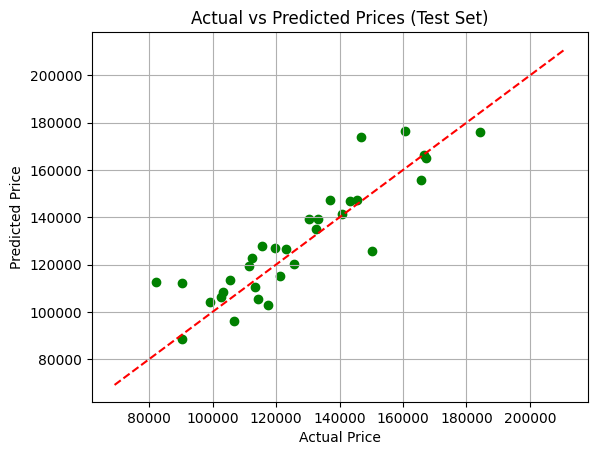

In [11]:
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.grid(True)
plt.show()


## Step 9: Interpret Model Coefficients


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


                Feature   Coefficient
0                  Area     40.398532
1              Bedrooms   2197.712872
2             Bathrooms   5460.768826
3      Material_Masonry  17739.527059
4    Locality_Riverside   6073.718462
5  Locality_Summit View  35022.205519


## Summary

- Used multiple predictors including categorical ones (via dummies)
- Achieved R² and RMSE scores on both train and test sets
- Interpreted how each feature contributes to the price
